In [88]:
import pandas as pd
import matplotlib.pyplot as plt

from statsapi_parameters_script import DATA_FILE_LOCATION , LEAGUE_NAME_LOCATION, american_league_team_id_name,national_league_team_id_name
from datetime import datetime

In [89]:
TODAY_DATE_TIME_EXECUTION = datetime.today().strftime("%Y-%m-%d")
print(TODAY_DATE_TIME_EXECUTION)

2023-06-18


## Define util functions

In [90]:
def get_league_player_stats(data: dict, league_name = None) -> pd.DataFrame:
    if league_name is None:
        return pd.concat([df for df in data.values()])
    else:
        return data[league_name]

In [91]:
def get_figure(df: pd.DataFrame, x_var: str, y_var : str):
    fig, ax = plt.subplots()
    (
        df.plot(
            ax=ax,  # type: ignore
            kind="scatter",
            x=x_var,
            y=y_var,
        )
    )
    for i, txt in enumerate(df.index.values):
        ax.annotate(
            txt.split(" ")[-1],
            (
                df[x_var].values[i],
                df[y_var].values[i],
            ),  # type: ignore
            fontsize=10,
        )
    return fig, ax

## Set up analysis

In [92]:
todays_data: dict = {}
for league_name in ["american_league", "national_league"]:
    TODAY_BATTER_DATA_FILE_NAME = f"{DATA_FILE_LOCATION}{league_name}_{TODAY_DATE_TIME_EXECUTION}_batter_stats_df.csv"
    todays_data[league_name] = pd.read_csv(TODAY_BATTER_DATA_FILE_NAME, index_col=0)

In [93]:
player_information_features = ["playername","team_id", "gamesPlayed","plateAppearances"]

In [94]:
def team_id_name_correspondence(league_name: str):
    if league_name == "american_league":
        team_id_name = american_league_team_id_name()
    elif league_name == "national_league":
        team_id_name = national_league_team_id_name()
    else:
        raise Exception("Unknown league name")
    return team_id_name

Define plate normalized data and team average data

In [112]:
plate_normalized_data: dict = {}
team_averages_data: dict = {}
for league in todays_data.keys():
    plate_normalized_features = [col for col in todays_data[league].columns if 'perplateAppearance' in col]
    plate_normalized_data_columns = player_information_features + plate_normalized_features
    plate_normalized_data[league] = todays_data[league][plate_normalized_data_columns]

    team_averages_data[league] = todays_data[league].groupby("team_id").mean()
    team_averages_data[league]["team_name"] = None

    team_id_name = team_id_name_correspondence(league)

    for team_id, team_name in team_id_name.items():
        team_averages_data[league].loc[team_id, "team_name"] = team_name
    team_averages_data[league] = team_averages_data[league].set_index("team_name")
    

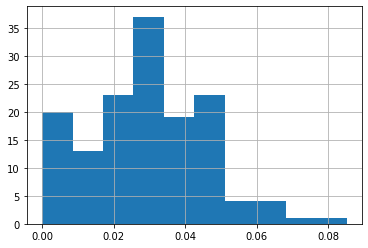

In [113]:
plate_normalized_data["american_league"]["homeRunsperplateAppearance"].hist()
plt.show()

## Team analysis

In [120]:
team_averages_data["american_league"].columns

Index(['gamesPlayed', 'groundOuts', 'airOuts', 'runs', 'doubles', 'triples',
       'homeRuns', 'strikeOuts', 'baseOnBalls', 'intentionalWalks', 'hits',
       'hitByPitch', 'avg', 'atBats', 'obp', 'slg', 'ops', 'caughtStealing',
       'stolenBases', 'groundIntoDoublePlay', 'plateAppearances', 'totalBases',
       'rbi', 'leftOnBase', 'sacBunts', 'sacFlies', 'groundOutsToAirouts',
       'catchersInterference', 'babip', 'difstrikeOutsbaseOnBalls',
       'strikeOutsperplateAppearance', 'homeRunsperplateAppearance',
       'hitsperplateAppearance', 'rbiperplateAppearance',
       'baseOnBallsperplateAppearance', 'totalBasesperplateAppearance',
       'difstrikeOutsbaseOnBallsperplateAppearance', 'avg_mean', 'avg_std',
       'normalized_avg', 'avg_z_score', 'babip_mean', 'babip_std',
       'normalized_babip', 'babip_z_score', 'obp_mean', 'obp_std',
       'normalized_obp', 'obp_z_score', 'ops_mean', 'ops_std',
       'normalized_ops', 'ops_z_score', 'hits_mean', 'hits_std',
       'no

In [122]:
team_averages_data["national_league"]["runs"].sort_values()

team_name
Miami Marlins            21.500000
Washington Nationals     24.125000
New York Mets            24.400000
San Diego Padres         24.416667
Colorado Rockies         26.285714
Pittsburgh Pirates       26.300000
St. Louis Cardinals      26.300000
Chicago Cubs             26.333333
Milwaukee Brewers        26.625000
San Francisco Giants     27.000000
Arizona Diamondbacks     27.909091
Cincinnati Reds          29.222222
Philadelphia Phillies    31.222222
Atlanta Braves           32.636364
Los Angeles Dodgers      32.777778
Name: runs, dtype: float64

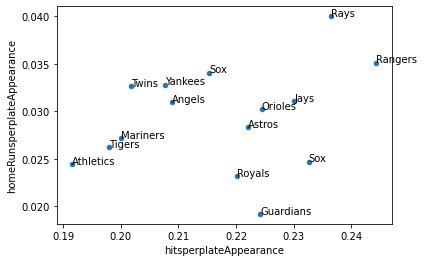

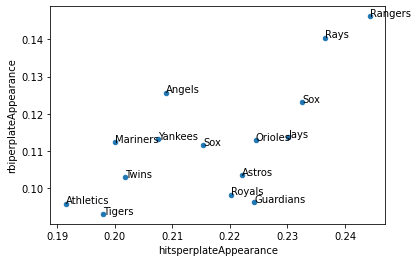

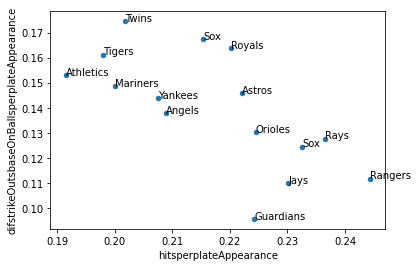

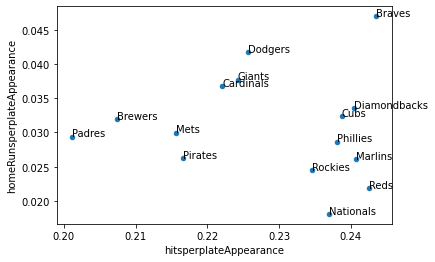

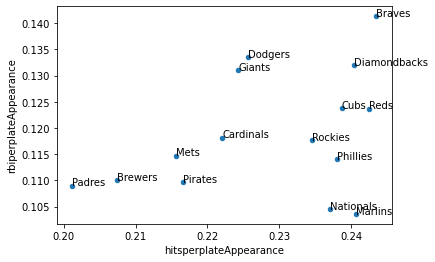

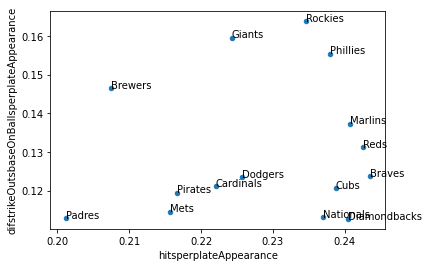

In [116]:
x_var = "hitsperplateAppearance"
y_var = "homeRunsperplateAppearance"

for league, df in team_averages_data.items():
    team_averages = df
    for y_var in ["homeRunsperplateAppearance", "rbiperplateAppearance", "difstrikeOutsbaseOnBallsperplateAppearance"]:
        get_figure(team_averages, x_var, y_var)

## Luis Arraez analysis

In [99]:
full_stats_df = get_league_player_stats(todays_data)

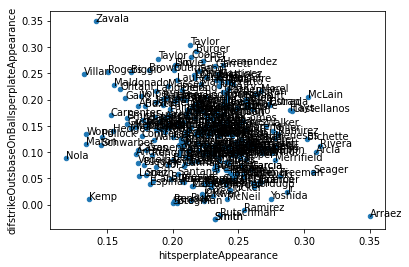

In [100]:
get_figure(full_stats_df.set_index("playername"), "hitsperplateAppearance", "difstrikeOutsbaseOnBallsperplateAppearance")
plt.show()

In [103]:
normalized_features = [col for col in todays_data["national_league"].columns if 'normalized' in col]
normalized_columns = player_information_features + normalized_features
print(normalized_columns)
normalized_analysis = full_stats_df[normalized_columns]

['playername', 'team_id', 'gamesPlayed', 'plateAppearances', 'normalized_avg', 'normalized_babip', 'normalized_obp', 'normalized_ops', 'normalized_hits', 'normalized_rbi', 'normalized_baseOnBalls', 'normalized_totalBases', 'normalized_difstrikeOutsbaseOnBalls']


In [104]:
normalized_analysis.shape

(287, 13)

In [106]:
for column in normalized_features:
    normalized_analysis[column + '_rank'] = normalized_analysis[column].rank(ascending = False)

/tmp/ipykernel_6688/502435425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized_analysis[column + '_rank'] = normalized_analysis[column].rank(ascending = False)
/tmp/ipykernel_6688/502435425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized_analysis[column + '_rank'] = normalized_analysis[column].rank(ascending = False)
/tmp/ipykernel_6688/502435425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [107]:
ranked_data = normalized_analysis[['playername'] + [col for col in normalized_analysis.columns if 'rank' in col]]

In [108]:
ranked_data[ranked_data["playername"] == "Luis Arraez"]

,playername,normalized_avg_rank,normalized_babip_rank,normalized_obp_rank,normalized_ops_rank,normalized_hits_rank,normalized_rbi_rank,normalized_baseOnBalls_rank,normalized_totalBases_rank,normalized_difstrikeOutsbaseOnBalls_rank
650333,Luis Arraez,1.0,4.0,1.0,9.5,2.0,79.5,112.5,39.0,286.5


In [109]:
ranked_data[["playername","normalized_difstrikeOutsbaseOnBalls_rank"]].sort_values(by ="normalized_difstrikeOutsbaseOnBalls_rank", ascending=False)

,playername,normalized_difstrikeOutsbaseOnBalls_rank
669257,Will Smith,286.5
650333,Luis Arraez,286.5
668939,Adley Rutschman,284.5
669257,Will Smith,284.5
608070,Jose Ramirez,283.0
...,...,...
681546,James Outman,5.0
678662,Ezequiel Tovar,4.0
660271,Shohei Ohtani,3.0
673357,Robert Jr.,2.0
